In [1]:
import pandas as pd

df = pd.read_csv("./phones.csv")

print("First 5 rows:")
print(df.head())

sorted_price = df.sort_values(by="Price_USD", ascending=False)

print("\nSorted by Price (High to Low):")
print(sorted_price)

sorted_ram = df.sort_values(by="RAM_GB", ascending=False)

print("\nSorted by RAM:")
print(sorted_ram)

First 5 rows:
     Brand          Model  Price_USD  RAM_GB  Storage_GB  Battery_mAh  \
0    Apple      iPhone 13        799       4         128         3240   
1    Apple      iPhone 14        899       6         128         3279   
2  Samsung     Galaxy S21        799       8         128         4000   
3  Samsung     Galaxy S22        999       8         256         3700   
4   Xiaomi  Redmi Note 11        249       6         128         5000   

   Release_Year  
0          2021  
1          2022  
2          2021  
3          2022  
4          2022  

Sorted by Price (High to Low):
     Brand          Model  Price_USD  RAM_GB  Storage_GB  Battery_mAh  \
6     Oppo        Find X5        999       8         256         4800   
3  Samsung     Galaxy S22        999       8         256         3700   
1    Apple      iPhone 14        899       6         128         3279   
0    Apple      iPhone 13        799       4         128         3240   
9     Vivo            X80        799      

In [3]:
print("\n 2. Clean the data")

print("Missing values before:\n", df.isnull().sum())
df = df.drop_duplicates()

df[df.select_dtypes(include="number").columns] = df.select_dtypes(include="number").fillna(
    df.select_dtypes(include="number").mean()
)

print("Missing values after:\n", df.isnull().sum())
print("Shape after removing duplicates:", df.shape)


 2. Clean the data
Missing values before:
 Brand           0
Model           0
Price_USD       0
RAM_GB          0
Storage_GB      0
Battery_mAh     0
Release_Year    0
dtype: int64
Missing values after:
 Brand           0
Model           0
Price_USD       0
RAM_GB          0
Storage_GB      0
Battery_mAh     0
Release_Year    0
dtype: int64
Shape after removing duplicates: (10, 7)


In [4]:
print("\n3: Exploratory Analysis")

print("\nSummary Statistics:")
print(df.describe())

print("\nSorted by Price (High → Low):")
print(df.sort_values("Price_USD", ascending=False)[["Brand", "Model", "Price_USD"]])

print("\nFilter: Phones with RAM >= 8GB:")
print(df[df["RAM_GB"] >= 8][["Brand", "Model", "RAM_GB", "Price_USD"]])


3: Exploratory Analysis

Summary Statistics:
        Price_USD     RAM_GB  Storage_GB  Battery_mAh  Release_Year
count   10.000000  10.000000   10.000000    10.000000     10.000000
mean   714.000000   7.600000  179.200000  4181.900000   2021.700000
std    253.913809   2.065591   66.098916   614.325728      0.483046
min    249.000000   4.000000  128.000000  3240.000000   2021.000000
25%    549.000000   6.500000  128.000000  3775.000000   2021.250000
50%    799.000000   8.000000  128.000000  4350.000000   2022.000000
75%    874.000000   8.000000  256.000000  4575.000000   2022.000000
max    999.000000  12.000000  256.000000  5000.000000   2022.000000

Sorted by Price (High → Low):
     Brand          Model  Price_USD
6     Oppo        Find X5        999
3  Samsung     Galaxy S22        999
1    Apple      iPhone 14        899
0    Apple      iPhone 13        799
9     Vivo            X80        799
2  Samsung     Galaxy S21        799
5   Xiaomi          Mi 11        699
7     Oppo     


 4: Pivot Table & Visualization

Pivot Table: Average Price per Brand
         Price_USD
Brand             
Apple        849.0
Oppo         749.0
Samsung      899.0
Vivo         599.0
Xiaomi       474.0


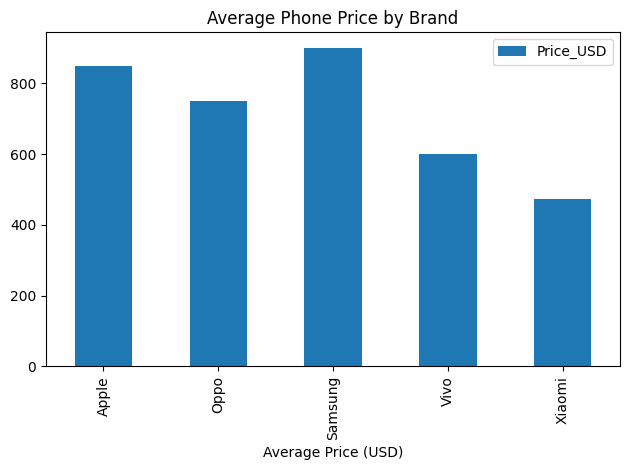

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n 4: Pivot Table & Visualization")

pivot = pd.pivot_table(
    df,
    values="Price_USD",
    index="Brand",
    aggfunc="mean"
)

print("\nPivot Table: Average Price per Brand")
print(pivot)

pivot.plot(kind="bar", title="Average Phone Price by Brand")
plt.xlabel("Average Price (USD)")
plt.tight_layout()
plt.show()

In [6]:
print("\n 5: Merge Two Datasets")

df_brand = pd.DataFrame({
    "Brand": ["Apple", "Samsung", "Xiaomi", "Oppo", "Vivo"],
    "Country": ["USA", "South Korea", "China", "China", "China"]
})

merged_df = pd.merge(df, df_brand, on="Brand", how="left")

print("\nMerged DataFrame (with Country):")
print(merged_df.head())


 5: Merge Two Datasets

Merged DataFrame (with Country):
     Brand          Model  Price_USD  RAM_GB  Storage_GB  Battery_mAh  \
0    Apple      iPhone 13        799       4         128         3240   
1    Apple      iPhone 14        899       6         128         3279   
2  Samsung     Galaxy S21        799       8         128         4000   
3  Samsung     Galaxy S22        999       8         256         3700   
4   Xiaomi  Redmi Note 11        249       6         128         5000   

   Release_Year      Country  
0          2021          USA  
1          2022          USA  
2          2021  South Korea  
3          2022  South Korea  
4          2022        China  
